# 3. (К теоритической задаче 5)

Искомое распределение - распределение Парето с плотностью $p(x)=\gamma(x-\alpha)^{-\gamma-1}I(x>\alpha+1)$ и параметрами $\gamma=5$ и $\alpha=0$. То есть $p(x)=5x^{-6}I(x>1)$. В таком случае легко проверить, что $\forall k\in\{1, 2, 3, 4\}\ Ex^k=\frac{5}{5 - k}$, но $\nexists\ Ex^5$

In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
gamma = 5
N = 10**4

# Реальная дисперсия
D = (5 / 3) - (5 / 4) ** 2
pareto = np.random.pareto(gamma, N) + 1

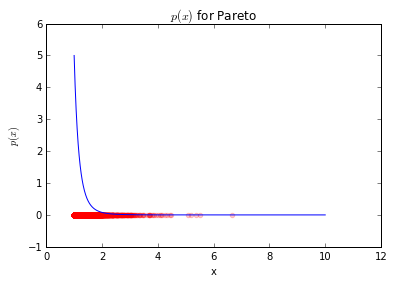

In [3]:
def paretoP(x):
    return 5 / (x ** 6)

myFigure, myAxis = plt.subplots()
xs = np.linspace(1, 10, 1000)

myAxis.plot(xs, [paretoP(x) for x in xs])
myAxis.scatter(pareto, np.zeros(len(pareto)), color = "red", alpha=0.2)
myAxis.set_xlabel("x")
myAxis.set_ylabel(r"$p(x)$")
myAxis.set_title(r"$p(x)$ for Pareto")

In [4]:
sum = 0
squareSum = 0
sSquare = []
for n in range(N):
    sum += pareto[n]
    squareSum += pareto[n] ** 2
    sSquare.append(squareSum / (n + 1) - (sum / (n + 1)) ** 2)

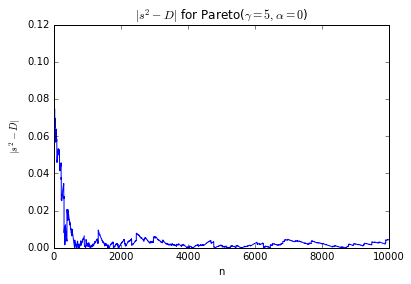

In [5]:
difference = []
for n in range(N):
    difference.append(abs(sSquare[n] - D))

myFigure, myAxis = plt.subplots()
myAxis.plot(difference)
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$|s^2 - D|$")
myAxis.set_title(r"$|s^2 - D|$ for Pareto($\gamma=5,\alpha=0$)")

Теперь посмотрим на распределение Коши с плотностью $p(x)=\frac{1}{\pi(1+x^2)}$

In [6]:
cauchy = np.random.standard_cauchy(N)

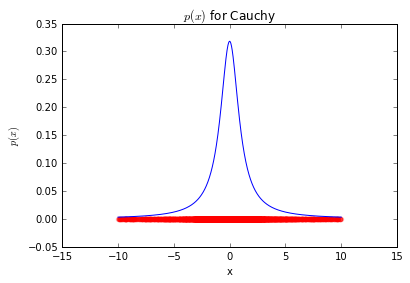

In [7]:
def cauchyP(x):
    return 1 / (math.pi * (1 + x ** 2))

myFigure, myAxis = plt.subplots()
xs = np.linspace(-10, 10, 1000)

cauchyPoints = [value for value in cauchy if -10 <= value <= 10]

myAxis.plot(xs, [cauchyP(x) for x in xs])
myAxis.scatter(cauchyPoints, np.zeros(len(cauchyPoints)), color = "red", alpha=0.2)

myAxis.set_xlabel("x")
myAxis.set_ylabel(r"$p(x)$")
myAxis.set_title(r"$p(x)$ for Cauchy")

In [8]:
sum = 0
squareSum = 0
cauchySSquare = []
for n in range(N):
    sum += cauchy[n]
    squareSum += cauchy[n] ** 2
    cauchySSquare.append(squareSum / (n + 1) - (sum / (n + 1)) ** 2)

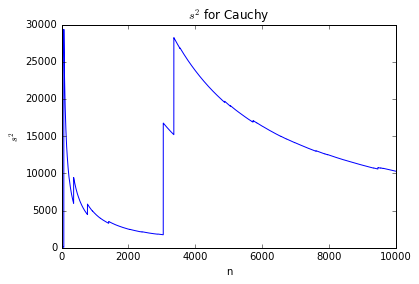

In [9]:
myFigure, myAxis = plt.subplots()
myAxis.plot(cauchySSquare)
myAxis.set_xlabel("n")
myAxis.set_ylabel(r"$s^2$")
myAxis.set_title(r"$s^2$ for Cauchy")

Заметим, что дисперсия для распределения Парето дисперсия оценивается достаточно правдоподобно, в отличие от распределения Коши